1.Qualitative analysis<br>
1.0.Product portfolio structure<br>
1.0.0.Market share evolution<br>
1.1.Analysis of financial statements<br>
1.2. Investment areas

2.Only using previous price.<br>
2.0.Incorporate news.

Analysis of financial statement

References
- YahooFinancials tutorial : https://www.analyticsvidhya.com/blog/2021/06/download-financial-dataset-using-yahoo-finance-in-python-a-complete-guide/
- doc : https://pypi.org/project/yahoofinancials/

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import sys
import tensorflow as tf
import time
import yahoo_fin.stock_info as si

from datetime import timedelta, datetime
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.stattools import adfuller
from yahoofinancials import YahooFinancials as yf

2025-04-17 15:27:06.275498: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [2]:
 # !pip3 freeze > requirments.txt

In [3]:
print(f"python version : {sys.version}")
print(f"pandas version : {pd.__version__}")
print(f"numpy version : {np.__version__}")

python version : 3.12.4 (v3.12.4:8e8a4baf65, Jun  6 2024, 17:33:18) [Clang 13.0.0 (clang-1300.0.29.30)]
pandas version : 2.2.2
numpy version : 1.26.4


In [4]:
airlines = {"air_canada":"AC.TO",
            "delta":"DAL",
            'korean_air':"003490.KS","Asiana":"020560.KS"}
airline_tickers = airlines.values()

In [5]:
end_date = datetime.today().strftime('%Y-%m-%d')
st_date = (datetime.today() - timedelta(days=365)).strftime('%Y-%m-%d')
hist_data = yf(airline_tickers).get_historical_price_data(start_date=st_date, end_date=end_date,
                                              time_interval='daily')
print(f"Getting data from {st_date} to {end_date}")

Getting data from 2024-04-17 to 2025-04-17


In [ ]:
stock_price_df_dict = {}
for airline_nm, ticker in airlines.items():
    print(airline_nm, ticker)
    df = pd.DataFrame(hist_data[ticker]['prices'])
    df = (df.drop(columns=['date'])
        .rename(columns={"formatted_date":"date"})
        .set_index('date')
        .sort_index(ascending=True))
    df.index = pd.to_datetime(df.index)
    df['currency'] = hist_data[ticker]['currency']
    stock_price_df_dict[ticker] = df

In [ ]:
ACtsx_df = stock_price_df_dict[airlines['air_canada']].copy()

ACtsx_df['high_sma50'] = ACtsx_df['high'].rolling(window=50).mean()
ACtsx_df['high_sma200'] = ACtsx_df['high'].rolling(window=200).mean()

# EMA: exponential moving avg. ???

# Res/Sup lines using fractals
support_line = ACtsx_df[ACtsx_df['low'] == ACtsx_df['low'].rolling(5, center=True).min()]['low']
resistance_line = ACtsx_df[ACtsx_df['high'] == ACtsx_df['high'].rolling(5, center=True).max()]['high']

In [ ]:
ACtsx_df

<b>Support and resistance levels</b>

Levels that limit market's range of movement. It has psychological effect on traders, which I should leverage.
- Support level: level where price regularly stops falling and bounces back up.
- Resistance level: level where price regularly stops rising and bounces back down.

<u>How to create?</u>
<br>  There are various ways. ex: Fibonacci levels, linear regression, etc...
<br>
Fractals
- Look at previous and next 2 candle sticks and if it is the lowest it is a support level and if it is highest it is a resistance level.
- candle sticks: made of three components
  - Body: rectangular section showing range between opening and closing prices.
  - Shadows/Wicks: lines that extend beyond the body, marking highest and lowest prices during the period.
  - Color: Green => bullish, closing price is higher than opening price. Red => Closing price lower than opening

Historical prices

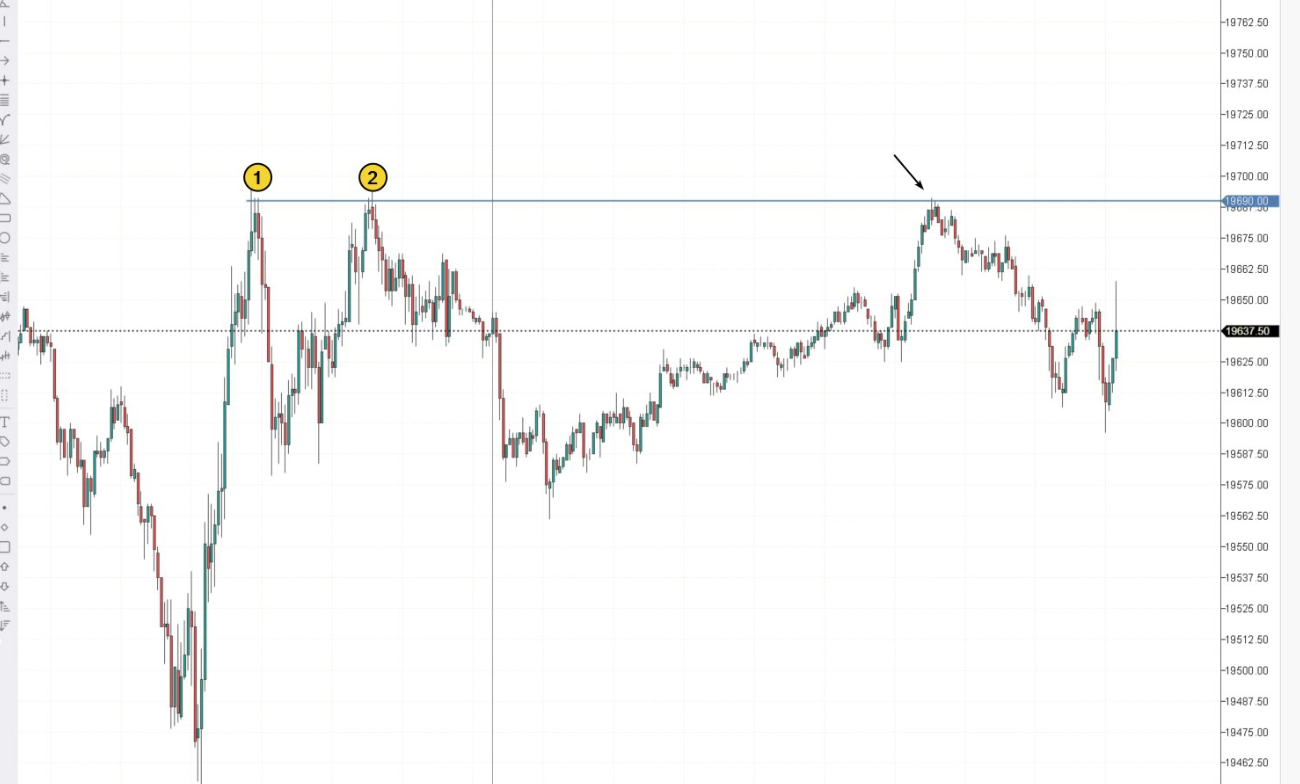
- Since price reversed downwards twice, it is likely to turn downward again in the future if it reaches that price level.
*This would have most psychological effect on traders as anyone can spot it.

- ??? Think of a way to incorporate this into the model.
  - Maybe once you hit res/supp line, weight = 1 but as price keeps continuing in such direction, increase the weight progressively.

<br><br>
<u>How to make investment decision with sup/res levels?</u><br>
Sell when price reaches resistance level, buy after price bounce on support line





???How can I test whether this is a good support or resistance level???

<b>Backtesting </b>

Process of evaluating a trading strategy using historical data to see how strategy would have performed in the past.

In [ ]:
support_line

In [ ]:
resistance_line

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= ACtsx_df.index, y=ACtsx_df['high'], name='AC.TO'))
fig.add_trace(go.Scatter(x= ACtsx_df.index, y=ACtsx_df['high_sma50'], name='sma50'))
fig.add_trace(go.Scatter(x= ACtsx_df.index, y=ACtsx_df['high_sma200'], name='sma200'))

fig.add_trace(go.Scatter(x=support_line.index, y=support_line, name='support',
                        # mode='lines+markers', 
                         marker_color='grey', opacity=0.4))
fig.add_trace(go.Scatter(x=resistance_line.index, y=resistance_line, name='resistance',
                        marker_color='grey', opacity=0.4))
    
fig.update_layout(
    title='Air canada stock price')
fig.show()

In [ ]:
# Support and resistance using fractals
ACtsx_df.head()

In [ ]:
ACtsx_df['low'].rolling(5, center=True).min()

# Intraday stock price tracker

1. Signal using trendlines
2. Evaluate and modify ML model online fashion

*Component Object Model(COM): program built by microsoft which allow any programming language to call classes developed in other language.

## 키움

In [ ]:
import sys
from PyQt5 import QtWidgets

app = QtWidgets.QApplication(sys.argv)
label = QtWidgets.QLabel("Hello PyQt")
label.show()
app.exec_()

## 1. Price only

- ??? price Vs. return?

In [ ]:
ACtsx_df.head()

In [ ]:
lags = 7
for i in range(1, lags+1):
    ACtsx_df[f'high_lag_{i}'] = ACtsx_df['high'].shift(i)

lag_cols = [col for col in ACtsx_df.columns if "lag" in col]
ACtsx_df.dropna(subset=lag_cols, inplace=True)

In [ ]:
tr_ratio = 0.8
train_idx = int(len(ACtsx_df)*tr_ratio)

In [ ]:
features = lag_cols
target_col = ["high"]
all_cols = features + target_col
train_df = ACtsx_df[all_cols].iloc[:train_idx].copy()
test_df = ACtsx_df[all_cols].iloc[train_idx:].copy()

In [ ]:
ACtsx_df[all_cols].corr()

In [ ]:
reg = np.linalg.lstsq(train_df[features], train_df[target_col], rcond=-1)[0]
pred = np.dot(train_df[features], reg)
train_df['pred'] = pred
mse = mean_squared_error(train_df[target_col], pred)
rmse = np.sqrt(mse)
print(f"mse: {mse}")
print(f"rmse: {rmse}")

In [ ]:
pred = np.dot(test_df[features], reg)
test_df['pred'] = pred
mse = mean_squared_error(test_df[target_col], pred)
rmse = np.sqrt(mse)
print(f"mse: {mse}")
print(f"rmse: {rmse}")

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= train_df.index, y=train_df['high'], name='AC.TO'))
fig.add_trace(go.Scatter(x= train_df.index, y=train_df['pred'], name='pred'))
fig.add_trace(go.Scatter(x= test_df.index, y=test_df['high'], name='AC.TO-test'))
fig.add_trace(go.Scatter(x= test_df.index, y=test_df['pred'], name='pred-test'))

fig.update_layout(
    title='Air canada stock price prediction')
fig.show()

In [ ]:
test_df.index

In [ ]:
ff_test_df.index

What happens if I predict further into the future
- use prediction of t to fill lag_1 for next day

Which you can see does a horrible job right from the second day forecast.

In [ ]:
"""
Predict `t` and use `pred_t` to predict `t+1`
"""
t1 = test_df[lag_cols].iloc[0].values
features = [t1]
n_forecast = 49
for i in range(1, n_forecast):
    pred_t1 = np.dot(t1, reg)
    t2 = np.insert(t1[:-1], 0, pred_t1)
    features.append(t2)
    t1 = t2

In [ ]:
ff_test_df = pd.DataFrame(features, columns=[lag_cols], index=test_df.index[:n_forecast])
ff_test_df[target_col] = test_df[target_col]
ff_test_df['pred'] = np.dot(ff_test_df[lag_cols], reg)

mse = mean_squared_error(ff_test_df[target_col], ff_test_df['pred'])
rmse = np.sqrt(mse)
print(f"mse: {mse}")
print(f"rmse: {rmse}")

# == Prediction fails miserably very early on, from the second forecasting day.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= train_df.index, y=train_df['high'], name='AC.TO'))
fig.add_trace(go.Scatter(x= train_df.index, y=train_df['pred'], name='pred'))
fig.add_trace(go.Scatter(x= test_df.index, y=test_df['high'], name='AC.TO-test'))
fig.add_trace(go.Scatter(x= test_df.index, y=test_df['pred'], name='pred-test'))
fig.add_trace(go.Scatter(x= ff_test_df.index, y=ff_test_df['pred'].values.reshape(-1), name='ff_pred-test'))
fig.update_layout(
    title='Air canada stock price prediction')
fig.show()

In [ ]:
# ??? I still don't understand why need to use percentage change. 
# Also I cannot compare it with price version as with perc_change it will be binary classification (up/down)

In [ ]:
"""
Data transformation

- Since all stocks are from different stock exchanges, and have different range, apply scaling.


What to see:
1. See if stocks from similar stock exchange tend to move in similar direction
2. Since all stocks are stocks of airline company, do they move simlarily despite diff stock exchange? 
"""
def apply_minmax(df):
    mm_scaler = MinMaxScaler()
    num_cols = df.select_dtypes(include=['float', 'int']).columns
    df[num_cols] = mm_scaler.fit_transform(df[num_cols])
    return df

stock_price_df_dict_trsfmd = {ticker:apply_minmax(df.copy()) for ticker, df in stock_price_df_dict.items()}

In [ ]:
fig = go.Figure()
df = stock_price_df_dict_trsfmd['AC.TO']
fig.add_trace(
    go.Scatter(
        x= df.index,
        y= df['high'],
        name='AC.TO'))
    
fig.update_layout(
    title='Airline stocks comparison [high]')
fig.show()

In [ ]:
fig = go.Figure()
df = stock_price_df_dict['AC.TO']
fig.add_trace(
    go.Scatter(
        x= df.index,
        y= df['high'],
        name='AC.TO'))
    
fig.update_layout(
    title='Airline stocks comparison [high]')
fig.show()

In [ ]:
fig = go.Figure()
for ticker, df in stock_price_df_dict_trsfmd.items():
    fig.add_trace(
        go.Scatter(
            x= df.index,
            y= df['high'],
            name=ticker))
    
fig.update_layout(
    title='Airline stocks comparison [high]')
fig.show()

In [ ]:
"""
See if stocks of similar domain tend to move together.
  If not, see what the differences are, for example even if the company is motor company it might have lot 
  of tangible assets that might be driving the stock price up.
"""

In [ ]:
ACtsx_df

In [ ]:
fig = go.Figure(data=[
    go.Candlestick(x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'])])

fig.update_layout(
    title='AC.TO',
    yaxis_title='USD'
)
fig.show()

In [ ]:
air_canada.get_financial_data()

In [ ]:
balance_sheets = air_canada.get_financial_stmts(frequency='quarterly', statement_type='balance')
income_stmts = air_canada.get_financial_stmts(frequency='quarterly', statement_type='income')

In [ ]:
dfs = []
for inc_stmt in income_stmts['incomeStatementHistoryQuarterly']['AC.TO']:
    dfs.append(pd.DataFrame(inc_stmt).T)
income_stmt_df = pd.concat(dfs)

dfs = []
for q_stats in balance_sheets['balanceSheetHistoryQuarterly']['AC.TO']:
    dfs.append(pd.DataFrame(q_stats).T)
bal_sheet_df = pd.concat(dfs)

In [ ]:
financial_stmt_df = pd.concat([income_stmt_df, bal_sheet_df], axis=1).sort_index(ascending=True)
financial_stmt_df.index = pd.to_datetime(financial_stmt_df.index)

In [ ]:
# ? find out way to left join but then if right table do not match, join with previous day.

# historical dataset does not have date that match fin_stmt therefore shifted +1 one day to join.
financial_stmt_df = (financial_stmt_df
                      .merge(df
#                              .shift(periods=1, freq='D')
                             ,how='left', left_index=True, right_index=True)
                      .sort_index(ascending=True))

In [ ]:
financial_stmt_df['p/e ratio'] = (financial_stmt_df['high'] / 
                                  (financial_stmt_df['netIncome'] / financial_stmt_df['shareIssued'])
                                 )

In [ ]:
financial_stmt_df['netIncome'] / financial_stmt_df['shareIssued']

In [ ]:
financial_stmt_df['p/e ratio']

In [ ]:
total_revenue=16_556_000
cost_of_revenue = 13_757_000 #same as COGS : costs associated with producing companys products
# in air canda this includes : FUEL, maintenance&repairs, other cost of revenue(???), etc...
opearting_expenses = 2_982_000 # indirect costs such as wages, rents, insurance, marketing, etc...
gross_profit =  2_799_000 # revenue - COGS

In [ ]:
book_value = assets - liabilities
PBR = marker_price_per_share / book_value_per_share

earnings_per_share = (netincome - preferred_dividends) / Average oustanding common shares
PER = marker_price_per_share / earnings_per_share

봐야 할것:

0. PER, PBR, 이익곡선 vs 주가 곡선 : 같은 분야의 기업들과 비교
1. 재무 상태, 현금 보유량
2. 기관투자자, 내부자 비중
3. 재고
4. 수요,공급 관계.
5. 신규로 진입하는 기업 a.k.a. 경쟁자 분석.

In [ ]:
airlines = {"air_canada":"AC.TO",
            "delta":"","westjet":"","lufthansa":"",
            "qatar":"","singapore_air":"",
            'korean_air':"","Asiana":"",
            "emirates":"",}

In [ ]:
balance_sheet = balance_sheet.T.sort_values("endDate")

In [ ]:
balance_sheet.T

# Timeseries forecasting

Stock analysis




Fundamental Vs. Technical


Traditional quant finance methods Vs. ML methods


# AI in Finance

Chapter 6

In [ ]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'
data = pd.read_csv(url, index_col=0, parse_dates=True).dropna()

In [ ]:
print(data.shape)
data.head(3)

In [ ]:
def add_lags(data, ric, lags):
    cols = []
    df = pd.DataFrame(data[ric]) 
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        df[col] = df[ric].shift(lag)
        cols.append(col)
    df.dropna(inplace=True)
    return df, cols

#### What's the point of taking lagged log returns? 
- To make data stationary. -> What is the benefit of having stationary data?
  - Models(like ARIMA, Exponential smoothing, and some ML) assume stable statistics in data b.c. their logic is built on $ Y_t = m_1Y_{t-1} +m_2Y_{t-2}+...+\epsilon_t $
  - i.e. it assumes data is generated from fixed, linear, and stationary process.
  - Way of handling this would be re-fitting constantly...

BUT LSTMs and other deep learning models can handle non-stationary time series.
- while a rising mean or shifting variance breaks an ARIMA model’s assumptions, for an LSTM, it’s just “another thing to learn.”

In [ ]:
rets = np.log(data / data.shift(1)).dropna()

In [ ]:
test_df = data[['AAPL.O']].copy()

In [ ]:
test_df.head()

In [ ]:
(test_df[['AAPL.O']] / test_df[['AAPL.O']].shift(1)).plot()

In [ ]:
# So I guess purpose of apply log function is to make it more intuitive
np.log(test_df[['AAPL.O']] / test_df[['AAPL.O']].shift(1)).plot()

In [ ]:
lags = 7
dfs = {}
for sym in data.columns:
    df, cols = add_lags(rets, sym, lags)
    # Normalize lagged log returns
    # These get applied on each columns separately.
    mu, std = df[cols].mean(), df[cols].std()
    df[cols] = (df[cols] - mu) / std
    dfs[sym] = df

???


In summary, if the EMH holds true, active or algorithmic portfolio management or trading would not make economic sense. Simply investing in a stock or an efficient portfolio in the MVP sense, say, and passively holding the investment over a long period would yield without any effort at least the same, if not superior, returns. According to the CAPM and the MVP, the higher the risk the investor is willing to bear, the higher the expected return should be. In fact, as Copeland et al. (2005, ch. 10) point out, the CAPM and the EMH form a joint hypothesis about financial markets: if the EMH is rejected, then the CAPM must be rejected as well, since its derivation assumes the EMH to hold true.

==> If markets are truly efficient (EMH), then there's no point in trying to beat them with active trading or fancy algorithms — you won’t do any better than someone who just buys and holds a smart, diversified portfolio.

Models like CAPM and minimum-variance portfolios say that if you want higher returns, you need to take on higher risk. But this logic depends on EMH being true. If you reject EMH (say, because someone does beat the market), then CAPM falls apart too, because its math assumes markets are efficient.

Stationarity

In mathematics and statistics, a stationary process (also called a strict/strictly stationary process or strong/strongly stationary process) is a stochastic process whose statistical properties, such as mean and variance, do not change over time. More formally, the joint probability distribution of the process remains the same when shifted in time. This implies that the process is statistically consistent across different time periods. Because many statistical procedures in time series analysis assume stationarity, non-stationary data are frequently transformed to achieve stationarity before analysis.

In [ ]:
"""
Adfuller is hypothesis testing. It sets "non-stationary" as null hypothesis
second element in the output represent p-value
 > 0.05 => No rejection, data is non-stationary.
 <= 0.05 => rejected, data is stationary.
"""

# We can see return data is stationary.
adfuller(dfs[sym]['lag_1'])

In [ ]:
cols

In [ ]:
# OLS regression

In [ ]:
df

In [ ]:
"""
For most stocks, we are able to correctly predict increase or decrease of daily price 
slightly over 50% of the time.

This does not tell you by how much however if I can increase % it might exploit 
statistical inefficiency. Can I also exploit economical inefficiency?
"""
# %%time
for sym in data.columns:
    df = dfs[sym].copy()
    # From Xb = Y, np learns b with objective to fine LS.
    reg = np.linalg.lstsq(df[cols], df[sym], rcond=-1)[0]
    pred = np.dot(df[cols], reg)
    # Accuracy for direction of stock price, not the price itself.
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred))
    print(f"OLS | {sym:10s} | acc={acc:.4f}")

In [ ]:
pred

In [ ]:
# Predict direction of return using DNN.
# BUT it is evaluating on training data....
for sym, df in dfs.items():
    inputs = tf.keras.Input(shape=(7,))
    dense = tf.keras.layers.Dense(units=512, activation='relu')(inputs)
    outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(dense)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam')

    model.fit(df[cols], df[sym], epochs=25, verbose=False)
    pred = model.predict(df[cols])
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred))
    print(f"DNN | {sym:10s} | acc={acc:.4f}")

In [ ]:
model.summary()

In [ ]:
## Adding more features to predict returns

In [ ]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'
aapl_df = pd.read_csv(url, index_col=0, parse_dates=True).dropna()[['AAPL.O']]

In [ ]:
window = 30
aapl_df['r'] = np.log(aapl_df / aapl_df.shift())
aapl_df['sma'] = aapl_df['AAPL.O'].rolling(window).mean()
aapl_df['min'] = aapl_df['AAPL.O'].rolling(window).min()
aapl_df['max'] = aapl_df['AAPL.O'].rolling(window).max()
aapl_df['mom'] = aapl_df['r'].rolling(window).mean() # Momentum as avg of log return
aapl_df['vol'] = aapl_df['r'].rolling(window).std() # Rolling volatility

aapl_df.dropna(inplace=True)

In [ ]:
cols = list(aapl_df.columns)
cols.remove("AAPL.O")
cols

In [ ]:
aapl_df[cols] = (aapl_df[cols] - aapl_df[cols].mean()) / aapl_df[cols].std()

In [ ]:
aapl_lag_df, _ = add_lags(aapl_df, 'r', lags=6)

In [ ]:
aapl_lag_df, _ = add_lags(aapl_df, 'r', lags=6)
aapl_df = pd.merge(aapl_df.drop(columns=["r"])
                       , aapl_lag_df
                       , right_index=True, left_index=True)

In [ ]:
cols = list(aapl_df.columns)
cols.remove("AAPL.O")
cols.remove("r")

In [ ]:
inputs = tf.keras.Input(shape=(len(cols),))
dense = tf.keras.layers.Dense(units=512, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(dense)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
pred

In [ ]:
aapl_df[cols] = (aapl_df[cols] - aapl_df[cols].mean()) / aapl_df[cols].std()
model.fit(aapl_df[cols], aapl_df['r'])
pred = model.predict(aapl_df[cols])
acc = accuracy_score(aapl_df['r'], pred)
print(f'IN-SAMPLE | AAPL.O | acc={acc:.4f}')

## Multivariate timeseries LSTM
[https://github.com/bnsreenu/python_for_microscopists/blob/master/181_multivariate_timeseries_LSTM_GE.py]

So this time we are formatting data in a different way<br>
-> Using past_n:t features to predict t+1 label.

??? Compare this data format for LSTM Vs. DNN

In [ ]:
# Obj: use multi-variables to predict open value
feature_cols = ['high', 'low', 'close', 'volume', 'adjclose']
label = ['open']

In [ ]:
ACtsx_df.head()

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(ACtsx_df[feature_cols])
ACtsx_df[feature_cols] = std_scaler.transform(ACtsx_df[feature_cols])

In [ ]:
ACtsx_df.head()

In [ ]:
trainX, trainY = [], []
n_future, n_past = 1, 14 # use prev 14 with multi-variables to predict t+1(label)
for i in range(n_past, len(ACtsx_df)-n_future-1):
    trainX.append(ACtsx_df[i-n_past:i][feature_cols])
    trainY.append(ACtsx_df[i+n_future-1:i+n_future][label])
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
print(trainX.shape)
print(trainY.shape)

In [ ]:
trainX.shape

In [ ]:
input_layer = tf.keras.layers.Input(shape=(trainX.shape[1], trainX.shape[2]))
x = tf.keras.layers.LSTM(64, activation='relu', return_sequences=True)(input_layer)
x = tf.keras.layers.LSTM(32, activation='relu', return_sequences=False)(x)
x = tf.keras.layers.Dropout(0.2)(x)
output_layer = tf.keras.layers.Dense(trainY.shape[1])(x)
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
history = model.fit(trainX, trainY
                    , epochs=6, batch_size=16
                    , validation_split=0.1, verbose=True)

In [ ]:
pred = model.predict(trainX)

In [ ]:
pred.shape

In [ ]:
ACtsx_df.head()

In [ ]:
pred

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()